# Brownian Motions

This Notebook introduces the concept of Brownian Motions and how to simulate them in Python.

First we take a look at the simple arithmetic Brownian Motion (ABM) and then we move on to the Geometric Brownian Motion (GBM) which is used to model stock prices.

$\textbf{Theory from a lecture at LMU by Dr. Ari-Pekka Perkkiö}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import fima

In [2]:
n = 10000
T = 1

### Arithmetic Brownian Motion

The ABM is a stochastic process. Its SDE is defined as:

$$
dS_{t} = \mu dt + \sigma dW_{t}
$$

where $S_{t}$ is the stock price at time $t$, $\mu$ is the drift, $\sigma$ is the volatility and $W_{t}$ is a Wiener process.

The solution to the SDE is:

$$
S_{t} = S_{0} + \mu t + \sigma W_{t}
$$

We will simulate the ABM using the Euler-Maruyama method. The Euler-Maruyama method is a numerical method to approximate solutions of stochastic differential equations (SDEs). It is defined as:

$$
S_{t+\Delta t} = S_{t} + \mu  \Delta t + \sigma \Delta W_{t}
$$

where $\Delta t$ is the time step and $\Delta W_{t}$ is the Wiener increment. The Wiener increment is defined as:

$$
\Delta W_{t} = \sqrt{\Delta t} Z
$$

where $Z$ is a random variable drawn from a normal distribution with mean 0 and variance 1.

In [3]:
def ABM(x0, mu, sigma, T, eta):
    n = len(eta)
    m = len(eta[0])
    dt = T / n
    S = np.zeros((n+1, m))
    S[0, :] = x0 * np.ones(m)
    for i in range(n):
        S[i+1, :] = S[i, :] + mu * dt + sigma * np.sqrt(dt) * eta[i, :]
    return S

In [4]:
S = ABM(0, 0.5, 0.2, T, np.random.randn(n, 10))

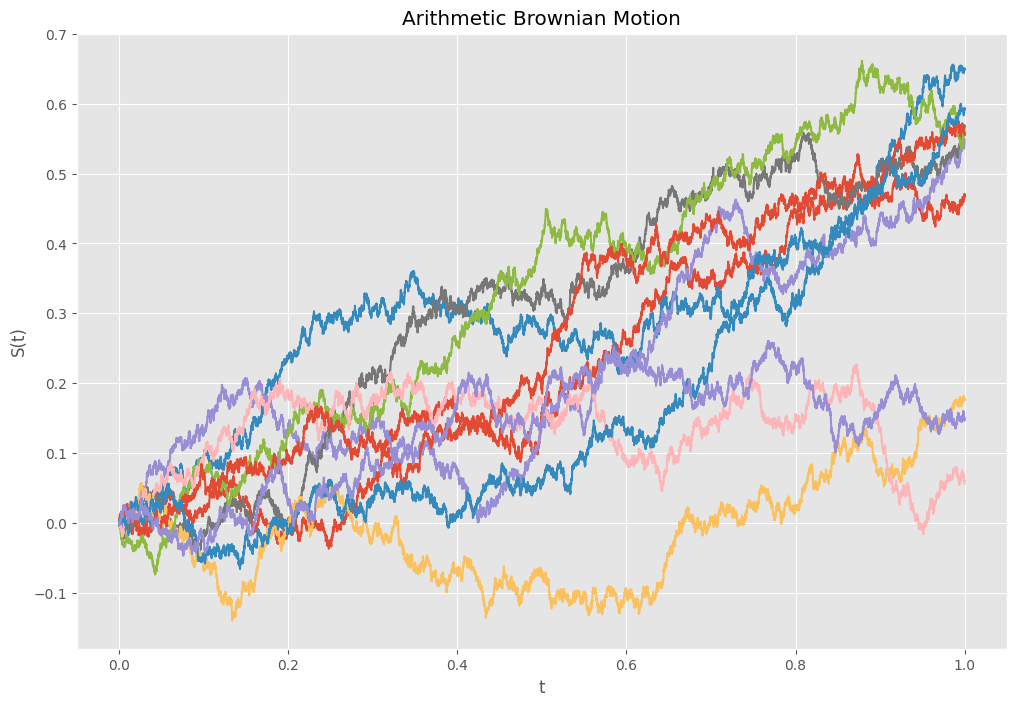

In [5]:
plt.plot(np.linspace(0, T, n+1), S)
plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('Arithmetic Brownian Motion');

In [6]:
for i in range(10):
    print(np.sqrt(np.cov(np.diff(S[:, i], axis = 0).T)*n/T))

0.20116353963032957
0.20052580883041662
0.2016305643669846
0.19940282565145157
0.20297001794058728
0.2000145460458886
0.19989575720580577
0.19961758730014942
0.20009384342841893
0.19937765294042942


### Geometric Brownian Motion

Now we will simulate a Geometric Brownian Motion (GBM) which is used to model stock prices.
The GBM is defined by the following stochastic differential equation (SDE):

$$dS_t = \mu S_t dt + \sigma S_t dW_t$$

The solution to this SDE is given by:

$$S_t = S_0 \exp\left(\left(\mu - \frac{\sigma^2}{2}\right)t + \sigma W_t\right)$$

We will simulate the GBM as follows:

$$S_{t+\Delta t} = S_{t} \exp\left(\left(\mu - \frac{\sigma^2}{2}\right)\Delta t + \sigma \Delta W_t\right)$$

To recover the volatility $\sigma$ from the GBM note that:

$$\log S_{t+\Delta t} - \log S_{t} = \left(\mu - \frac{\sigma^2}{2}\right)\Delta t + \sigma \Delta W_t$$

For a multidiemensional GBM we have:

$$S^{i}_{t+\Delta t} = S^{i}_{t} \exp\left(\left(\mu^{i} - \frac{1}{2}\sum_{j=1}^{d}\sigma^{i,j}\sigma^{i,j}\right)\Delta t + \sum_{j=1}^{d}\sigma^{i,j} \Delta W^{j}_{t}\right)$$

where $i$ is the number of dimensions.

In [7]:
def calculate_sigma(S, T):
    cov = np.cov(np.diff(np.log(S), axis = 0).T)*n/T
    cov_chol = np.linalg.cholesky(cov)
    return cov_chol

In [8]:
#here sigma is a matrix
def GBMpathsCov(x0, mu, sigma, T, eta):
    n = len(eta)
    m = len(eta[0])
    dt = T/n
    S = np.zeros((n+1, m))
    S[0, :] = x0
    L = np.linalg.cholesky(sigma)
    for i in range(m):
        for j in range(1, n+1):
            S[j,i] = S[j-1,i] * np.exp((mu[i] - 0.5 * np.sum(L[i,:]**4)) * dt + np.sum(L[i,:]**2 * np.sqrt(dt) * eta[j-1, :]))

    return S

#here sigma is a vector
def GBMpaths(x0, mu, sigma, T, eta):
    n = len(eta)
    m = len(eta[0])
    dt = T/n
    S = np.zeros((n+1, m))
    S[0, :] = x0 * np.ones(m)
    for i in range(n):
        S[i+1, :] = S[i, :] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * eta[i, :])

    return S

[[ 0.30460257  0.          0.        ]
 [ 0.03491251  0.26273117  0.        ]
 [ 0.00374138 -0.00143209  0.2992829 ]]


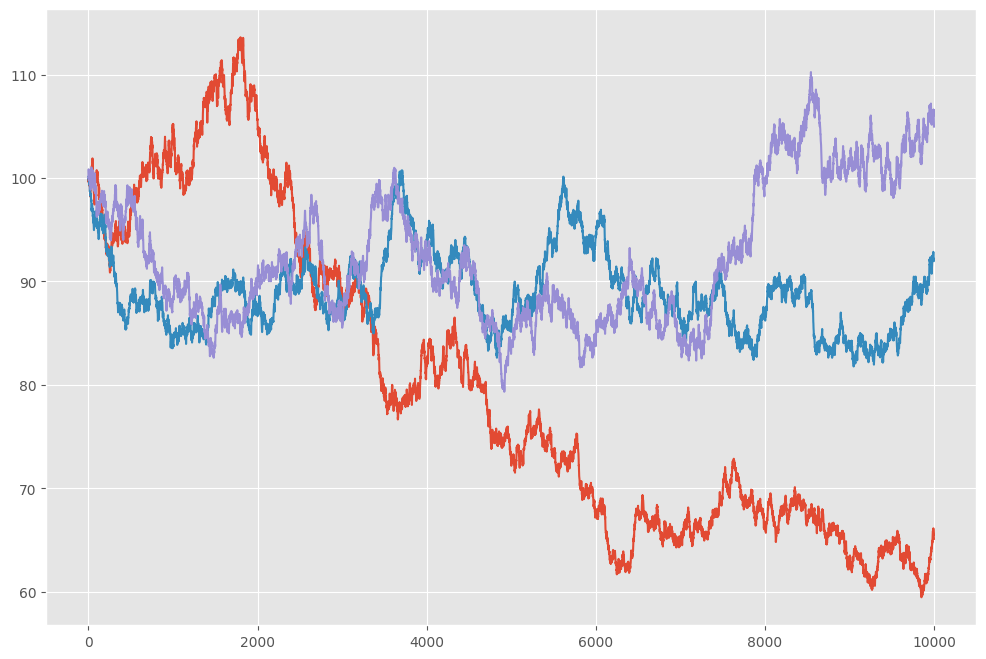

In [9]:
mu = np.array([0, 0, 0.5])
sigma = np.array([[0.3, 0.1, 0], 
                  [0.1, 0.3, 0],
                  [0, 0, 0.3]])

eta = np.random.randn(n, 3)

S = GBMpathsCov(np.array([100, 100, 100]), mu, sigma, T, eta)

print(calculate_sigma(S, T))

plt.plot(S);

In [10]:
sigma = np.array([0.3, 0.3, 0.3])
S = GBMpaths(np.array([100, 100, 100]), mu, sigma, T, eta)

print(calculate_sigma(S, T))

[[ 0.30460257  0.          0.        ]
 [ 0.00120125  0.29557257  0.        ]
 [ 0.00374138 -0.00143209  0.2992829 ]]


In [11]:
S = GBMpathsCov(np.array([100, 100, 100]), mu, np.diag(sigma), T, eta)

print(calculate_sigma(S, T))

[[ 0.30460257  0.          0.        ]
 [ 0.00120125  0.29557257  0.        ]
 [ 0.00374138 -0.00143209  0.2992829 ]]
